In [1]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [17]:
image = cv2.imread('d.jpg')
# cv2.imshow('sample image',image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [18]:

def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

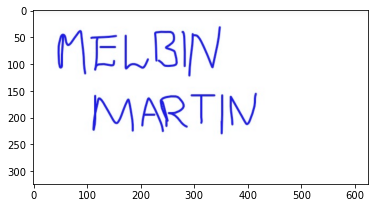

In [19]:
plt.imshow(image)

In [20]:
gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [12]:
# plt.imshow(gray)
# plt.imshow(thresh)
# plt.imshow(opening)
# plt.imshow(canny)


In [ ]:
img2 = pytesseract.image_to_string(image)
print(img2)

In [12]:
img2 = pytesseract.image_to_string(canny)
print(img2)

Meloy
mM acots ”



In [13]:
img2 = pytesseract.image_to_string(gray)
print(img2)

Me\biy\
M acoti



In [14]:
img2 = pytesseract.image_to_string(thresh)
print(img2)

Melby
mM arotin

